# Predictive Modelling

In [1]:
#Load all relevant libraries
library(forecast)
library(MLmetrics)
library(astsa)

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall


Attaching package: ‘astsa’

The following object is masked from ‘package:forecast’:

    gas



## 1.0 Data Loading and Preprocessing

In [2]:
#Read in the bikeshare data (aggregated by month)
bshare <- read.csv("bikeshare_monthly.csv")

In [5]:
head(bshare)

Date,Number.of.Trips
January 2018,43339
February 2018,48832
March 2018,83070
April 2018,90767
May 2018,196839
June 2018,234803


In [6]:
#Convert bikeshare monthly data into a time series object
bshare_ts <- ts(bshare["Number.of.Trips"],frequency=12,start=c(2018,1))

In [7]:
print(bshare_ts)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
2018  43339  48832  83070  90767 196839 234803 268963 263857 241646 169732
2019  58590  38175  83450 136616 198820 273388 357068 389051 313539 236790
2020  98037  91258  98618  66054 173305 332001 418997 455423 413186 262984
        Nov    Dec
2018 101440  81255
2019 131923  78836
2020 191510  90808


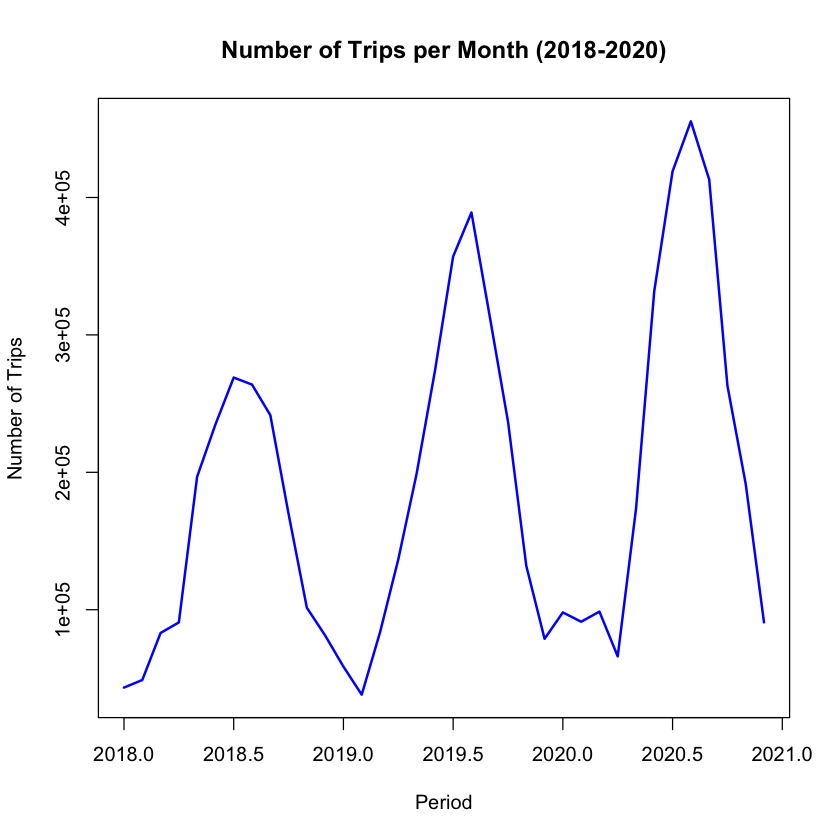

In [8]:
#Plot the data on a line graph
plot.ts(bshare_ts,col="blue",xlab="Period", ylab="Number of Trips",main="Number of Trips per Month (2018-2020)", type='l',lwd=2)

## 2.0 Decomposition of Data

In [9]:
#Decompose the data into trend, seasonal and random components
bshare_decomposed <- decompose(bshare_ts,"multiplicative")

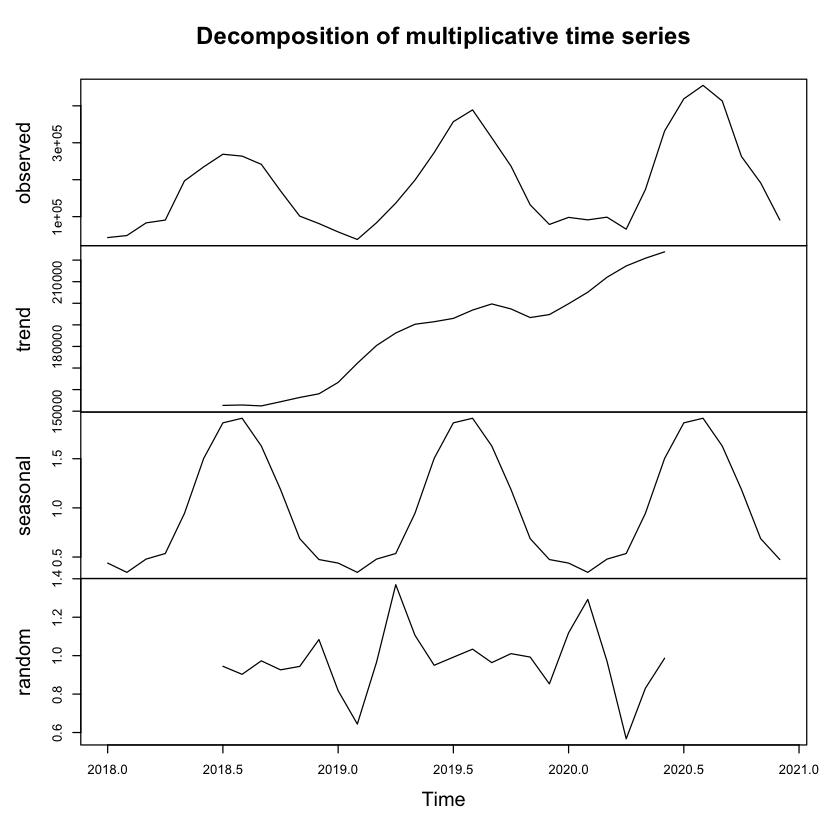

In [10]:
plot(bshare_decomposed)

In [11]:
print(bshare_decomposed$seasonal)

           Jan       Feb       Mar       Apr       May       Jun       Jul
2018 0.4386020 0.3441678 0.4789532 0.5357706 0.9446692 1.5031495 1.8649195
2019 0.4386020 0.3441678 0.4789532 0.5357706 0.9446692 1.5031495 1.8649195
2020 0.4386020 0.3441678 0.4789532 0.5357706 0.9446692 1.5031495 1.8649195
           Aug       Sep       Oct       Nov       Dec
2018 1.9117166 1.6292055 1.1871585 0.6872248 0.4744628
2019 1.9117166 1.6292055 1.1871585 0.6872248 0.4744628
2020 1.9117166 1.6292055 1.1871585 0.6872248 0.4744628


In [56]:
nrow(bshare)

[1] 36

## 3.0 Training and Validation sets

In [12]:
#Create training and test sets
training <- window(bshare_ts, start = c(2018,1), end = c(2020,6))
validation <- window(bshare_ts, start = c(2020,7))


## 4.0 Model Building and Training

### 4.1 Seasonal Naive Model (Baseline Model)

In [13]:
naive = snaive(training, h=length(validation))

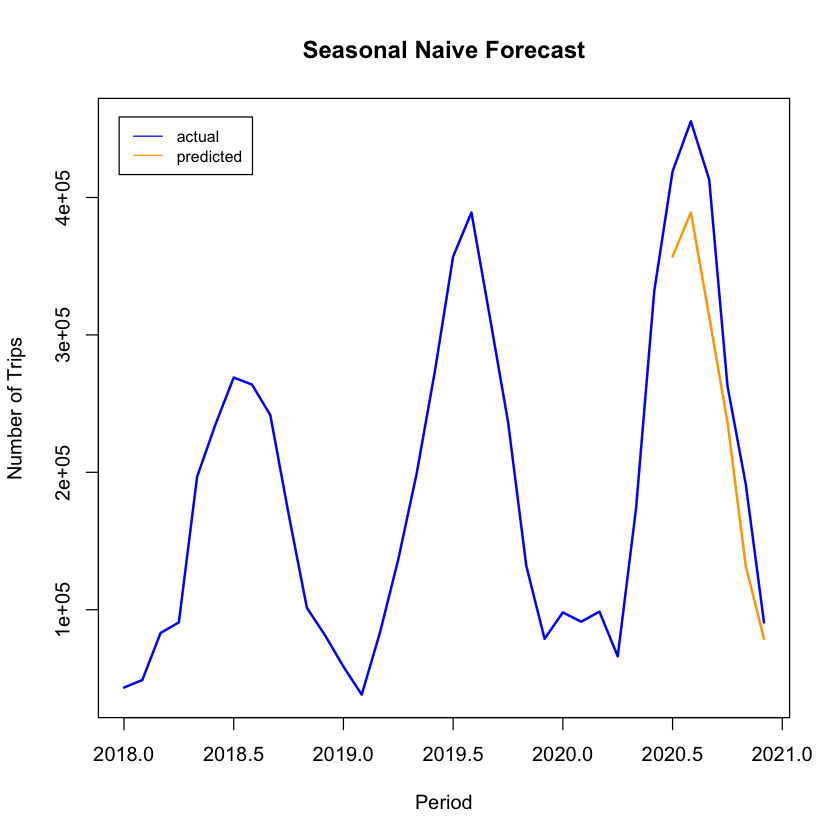

In [14]:
#plot the actual values
plot(bshare_ts,col="blue",xlab="Period", ylab="Number of Trips",main="Seasonal Naive Forecast", type='l',lwd=2)
#plot the predicted values
lines(naive$mean,col="orange",lwd=2)
#add a legend
legend("topleft",inset=.03,legend=c("actual", "predicted"),col=c("blue","orange"),lty=1:1,cex=0.8)

In [15]:
MAPE(naive$mean, validation) * 100

[1] 17.95487

In [16]:
RMSE(naive$mean, validation)

[1] 61305.29

In [21]:
R2_Score(naive$mean,validation)

[1] 0.7909105

### 4.2 DSHW Model

In [23]:
#Build and train a DSHW model
dshw_model = dshw(training, period1=2, period2 = 12, h=length(validation))

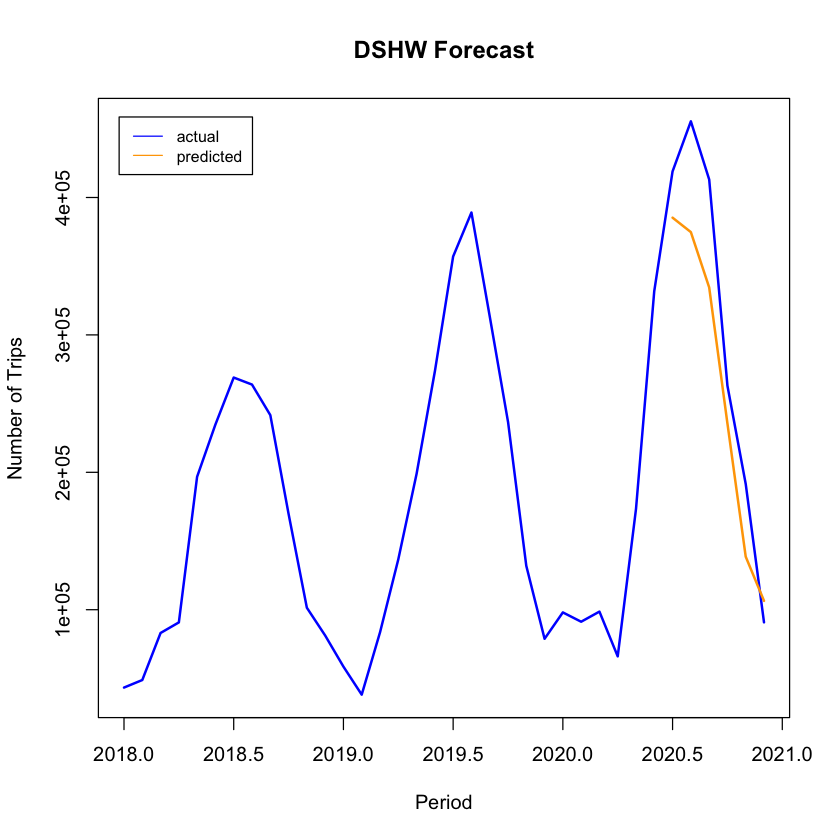

In [24]:
#plot the actual values
plot(bshare_ts,col="blue",xlab="Period", ylab="Number of Trips",main="DSHW Forecast", type='l',lwd=2)
#plot the predicted values
lines(dshw_model$mean,col="orange",lwd=2)
#add a legend
legend("topleft",inset=.03,legend=c("actual", "predicted"),col=c("blue","orange"),lty=1:1,cex=0.8)

In [25]:
MAPE(dshw_model$mean, validation)*100

[1] 16.67651

In [26]:
RMSE(dshw_model$mean, validation)

[1] 54172.49

In [27]:
R2_Score(dshw_model$mean,validation)

[1] 0.8367347

### 4.3 SARIMA Model

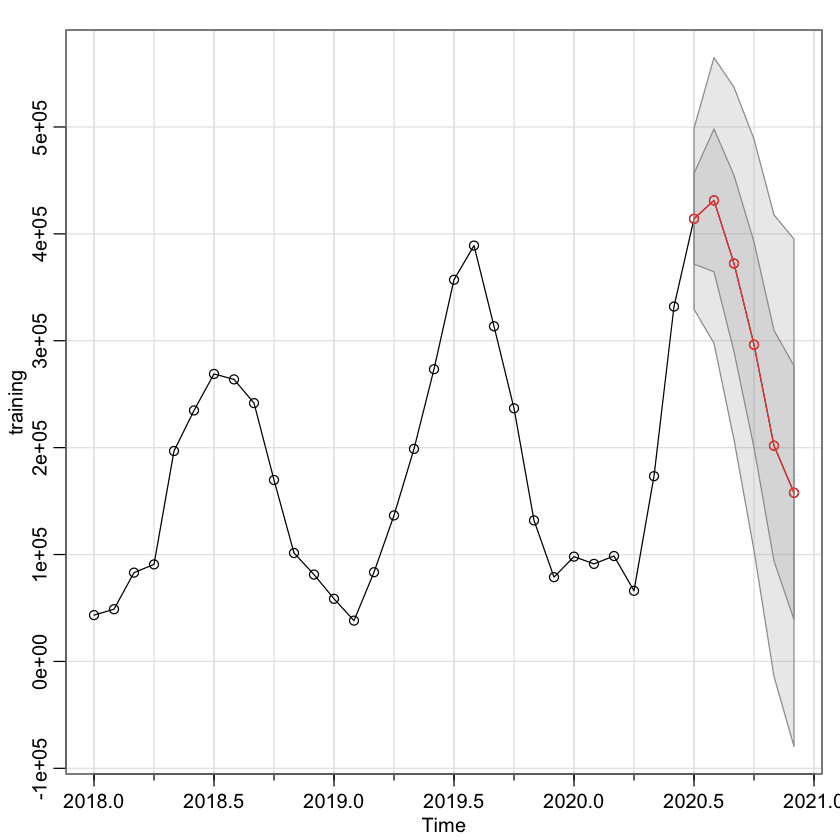

In [28]:
sarima_forecast = sarima.for(training, n.ahead=length(validation),
                              p=1,d=1,q=1,P=1,D=1,Q=0,S=12)

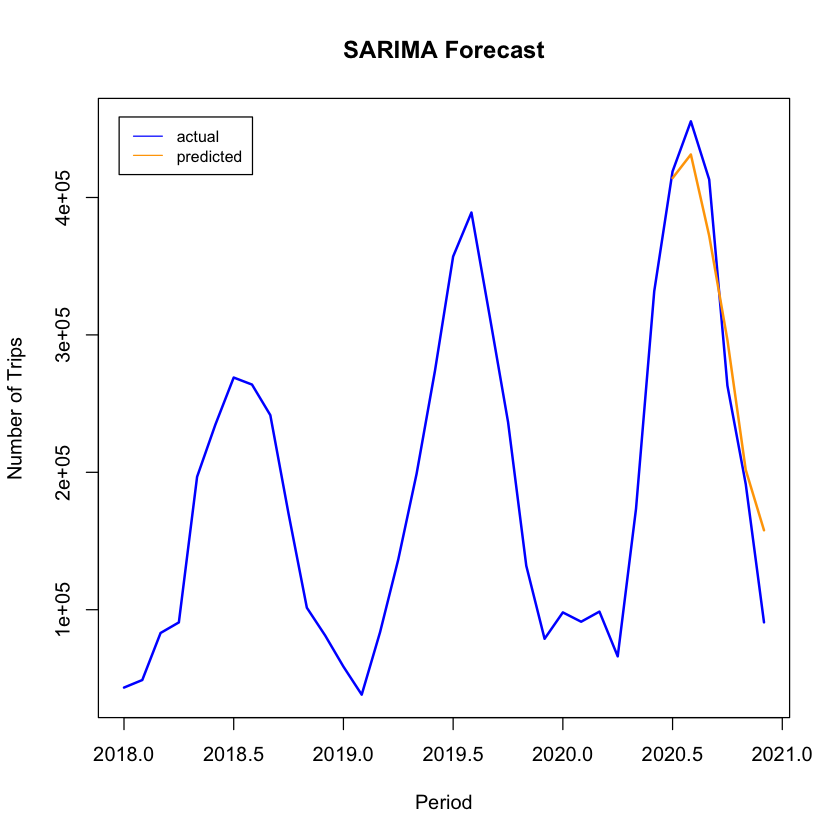

In [29]:
#plot the actual values
plot(bshare_ts,col="blue",xlab="Period", ylab="Number of Trips",main="SARIMA Forecast", type='l',lwd=2)
#plot the predicted values
lines(sarima_forecast$pred,col="orange",lwd=2)
#add a legend
legend("topleft",inset=.03,legend=c("actual", "predicted"),col=c("blue","orange"),lty=1:1,cex=0.8)

In [30]:
MAPE(sarima_forecast$pred, validation) * 100

[1] 18.03139

In [31]:
RMSE(sarima_forecast$pred, validation)

[1] 36477.88

In [32]:
R2_Score(sarima_forecast$pred,validation)

[1] 0.9259721

### 4.4 TBATS Model

In [33]:
tbats_model = tbats(training)
tbats_forecast = forecast(tbats_model, h=length(validation))

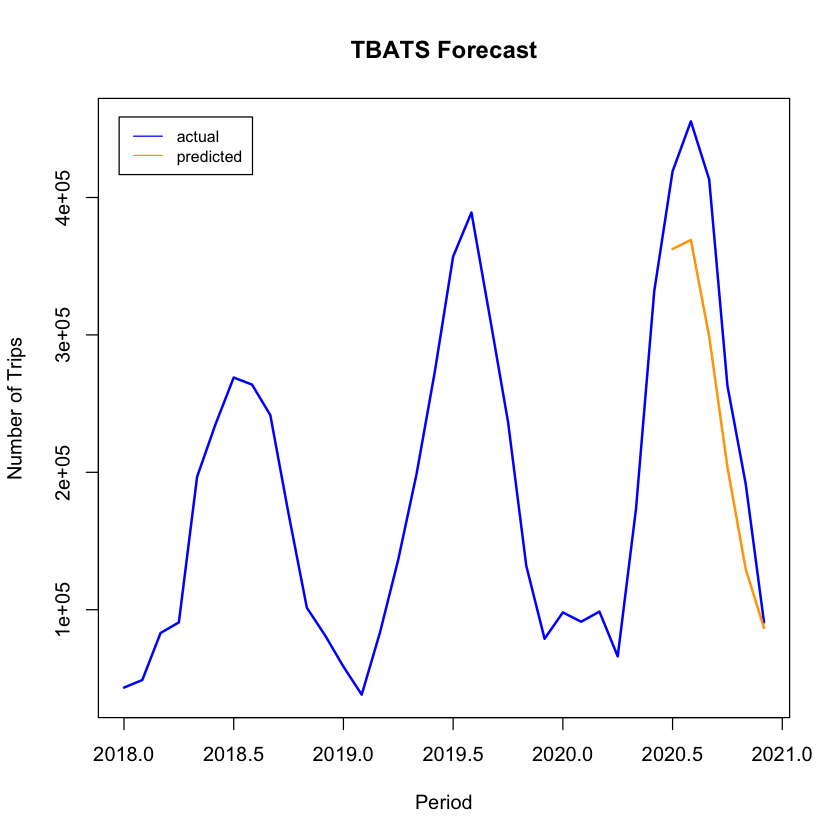

In [34]:
#plot the actual values
plot(bshare_ts,col="blue",xlab="Period", ylab="Number of Trips",main="TBATS Forecast", type='l',lwd=2)
#plot the predicted values
lines(tbats_forecast$mean,col="orange",lwd=2)
#add a legend
legend("topleft",inset=.03,legend=c("actual", "predicted"),col=c("blue","orange"),lty=1:1,cex=0.8)

In [35]:
MAPE(tbats_forecast$mean, validation) * 100

[1] 19.90136

In [36]:
RMSE(tbats_forecast$mean, validation)

[1] 71953.22

In [37]:
R2_Score(tbats_forecast$mean,validation)

[1] 0.7119707

### 4.5 NNETAR Model

In [49]:
nn_model <- nnetar(training)
nn_forecast <- forecast(nn_model, h=length(validation))

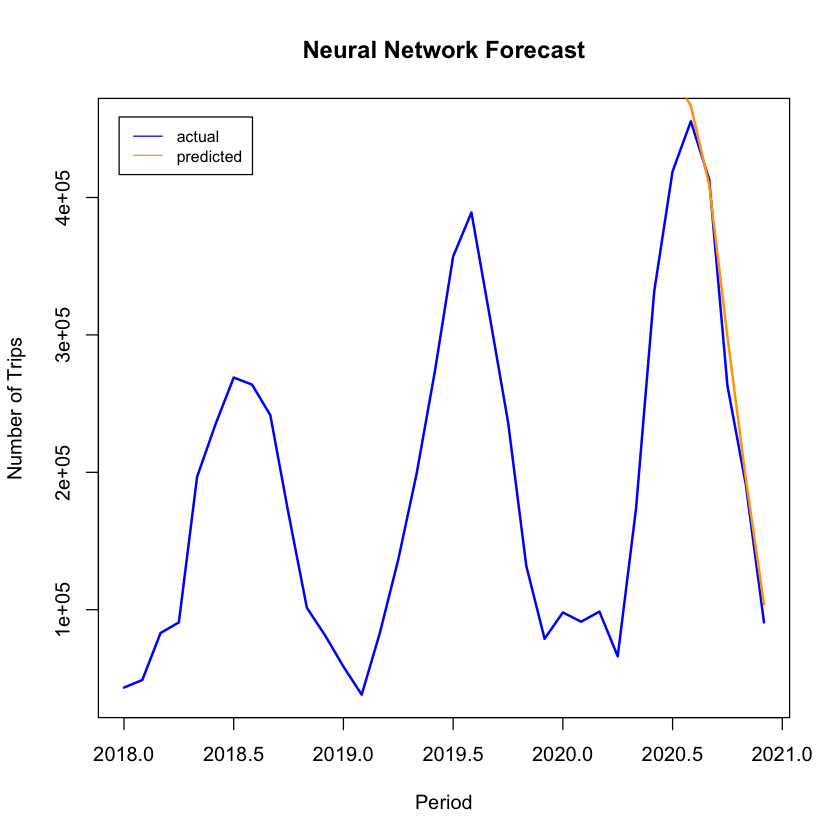

In [50]:
#plot the actual values
plot(bshare_ts,col="blue",xlab="Period", ylab="Number of Trips",main="Neural Network Forecast", type='l',lwd=2)
#plot the predicted values
lines(nn_forecast$mean,col="orange",lwd=2)
#add a legend
legend("topleft",inset=.03,legend=c("actual", "predicted"),col=c("blue","orange"),lty=1:1,cex=0.8)

In [51]:
MAPE(nn_forecast$mean, validation) * 100

[1] 8.447846

In [52]:
RMSE(nn_forecast$mean, validation)

[1] 33021.93

In [53]:
R2_Score(nn_forecast$mean,validation)

[1] 0.9393346

In [57]:
install.packages("pandoc")

Warning message:
“package ‘pandoc’ is not available (for R version 3.6.1)”